In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\Rishi\Downloads\heart\heart.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

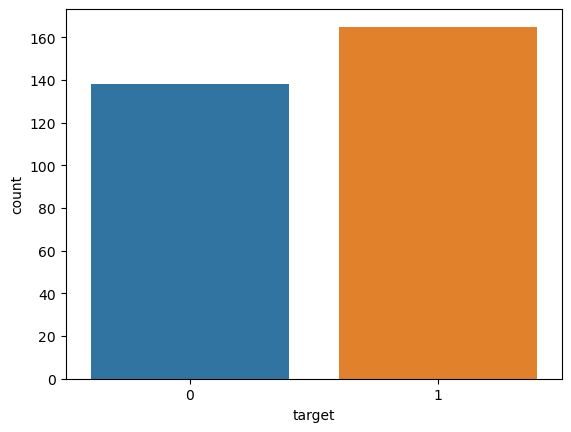

In [6]:
sns.countplot(x="target",data=df)
plt.show()

# Split data into features and target variable

In [12]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [13]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# Split dataset into training and testing

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# Building a logistic regression Model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logit=LogisticRegression(max_iter=1000)

logit.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [19]:
predicted=logit.predict(x_test)

In [20]:
predicted

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [21]:
## Coefficients
print(X.columns)
print(logit.coef_)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
[[ 1.38810526e-03 -1.55657151e+00  8.21743138e-01 -1.63808978e-02
  -4.26856041e-03 -6.90076191e-02  4.47835552e-01  2.04784276e-02
  -7.63211212e-01 -4.19429252e-01  6.18931955e-01 -6.55777837e-01
  -7.20540241e-01]]


In [22]:
print(logit.intercept_)

[2.29637016]


# Evaluating the Model performance

In [23]:
#Accuracy

from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,predicted))
print("Accuracy: ", accuracy_score(y_test,predicted))

[[26  6]
 [ 1 28]]
Accuracy:  0.8852459016393442


In [24]:
## Precision, Recall, F1 score

from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))

print("F1 score:",f1_score(y_test,predicted))

0.8235294117647058
0.9655172413793104
F1 score: 0.888888888888889


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



# ROC Curve -- Reciever operating characteristic curve

In [26]:
pred_prob=logit.predict_proba(x_test)[:,1]

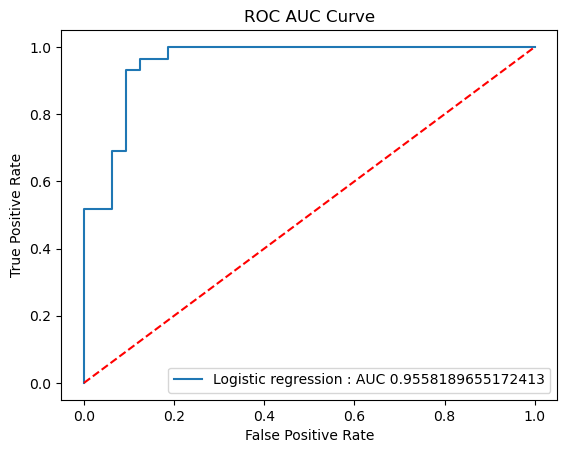

In [27]:
from sklearn.metrics import roc_auc_score,roc_curve

logit_roc_auc=roc_auc_score(y_test,pred_prob)
fpr,tpr,thresholds=roc_curve(y_test,pred_prob)

plt.figure()
plt.plot(fpr,tpr,label="Logistic regression : AUC "+str(logit_roc_auc))
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC AUC Curve")
plt.show() 